# Prática I - Redes Neurais usando Python

### Definição de funções necessárias

In [1]:
import torch
import torch.nn as nn   #Definicao da rede neural
from torch.utils.data import Dataset, DataLoader  #utilidade para dataset

from tqdm.notebook import tqdm

from sklearn.model_selection import cross_val_score, KFold, train_test_split

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_iris
import numpy as np 

In [2]:
#Função necessária para criar um custom dataset no Pytorch
class CustomDataset(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


### Dataset e pré-processamento

Neste exemplo, iremos usar o dataset Iris. É um problema bastante conhecido na área de Ciência de Dados.
A base de dados possui 150 registros e 4 atributos, com informações de comprimento e largura de suas pétalas e sépalas. No total, temos 50 amostras para cada uma das três classes: Iris-Setosa, Iris-Verginica e Iris-Versicolor

<img src='https://miro.medium.com/max/1000/1*nfK3vGZkTa4GrO7yWpcS-Q.png' alt='iris-dataset' width=500 />

#### Carregando a base de dados 

In [3]:
data = load_iris()
X = data.data
target = data.target

#### Pré-processamento

Etapas necessárias:

$\bullet$ Transformação os rótulos de saída.

$\bullet$ Geração um conjunto de treinamento, validação e teste.

$\bullet$ Normalização dos dados.

### Construção do Dataset e Dataloader

Lembrete: Dependendo do tipo de problema, devemos adequar o tipo das variáveis. No exemplo abaixo, estamos adequando as variáveis `X_train`, `X_val` e `X_test` do tipo `double` para `float`. Em alguns casos (especialmente em problemas com múltiplas classes), temos que adequar as saídas desejadas para o tipo `long`.

#### Definição do Dataset

#### Definição do Dataloader

### Criação do modelo de Redes Neurais

Para a criação de um modelo de Redes Neurais, precisamos definir:

$\bullet$ Arquitetura da rede.

$\bullet$ Função de perda

$\bullet$ Algoritmo de otimização 

#### Definição da arquitetura de Redes Neurais

In [7]:
#Criar usando classe. 

class NeuralNetwork(torch.nn.Module):

  def __init__(self,hidden_neurons = 4, hidden_activation = 'relu', output_activation='softmax', n_input = 1, n_output = 1):
    pass

  def forward(self,x):
    pass

#### Definição de hiperparâmetros

In [8]:
lr = 10e-4 
hidden_neurons = 5
n_epochs=1000

In [9]:
model = NeuralNetwork(hidden_neurons=hidden_neurons, n_input=4, n_output=3)

#### Definição da função de perda e o método de otimização para atualização dos pesos

In [10]:



history = {'acc_train' : [], 'loss_train': [], 'acc_val': [], 'loss_val': []}

### Treinamento

Vamos criar uma função de treinamento de uma Rede Neural. Neste caso, definiremos um loop para o treinamento por `n_epochs` épocas.

In [11]:
loss_list=[]



epoch 0, loss 1.1960073709487915
epoch 1, loss 1.1914565563201904
epoch 2, loss 1.1870173215866089
epoch 3, loss 1.182694911956787
epoch 4, loss 1.1784952878952026
epoch 5, loss 1.174423098564148
epoch 6, loss 1.1704813241958618
epoch 7, loss 1.166671633720398
epoch 8, loss 1.1629947423934937
epoch 9, loss 1.1594493389129639
epoch 10, loss 1.1560345888137817
epoch 11, loss 1.1527478694915771
epoch 12, loss 1.14958655834198
epoch 13, loss 1.1465471982955933
epoch 14, loss 1.1436265707015991
epoch 15, loss 1.140820860862732
epoch 16, loss 1.138126254081726
epoch 17, loss 1.135538935661316
epoch 18, loss 1.1330548524856567
epoch 19, loss 1.130670189857483
epoch 20, loss 1.1283808946609497
epoch 21, loss 1.1261833906173706
epoch 22, loss 1.1240733861923218
epoch 23, loss 1.1220473051071167
epoch 24, loss 1.1201014518737793
epoch 25, loss 1.118232250213623
epoch 26, loss 1.1164358854293823
epoch 27, loss 1.1147087812423706
epoch 28, loss 1.1130475997924805
epoch 29, loss 1.1114490032196045


### Avaliação do modelo

Vamos agora avaliar o modelo treinado. Para isso, mudamos o modelo para o "modo" eval. Além disso, usamos o `torch.no_grad()`, para que a execução do trecho de código tenha o autograd engine desativado. 

Lembrete: Caso queira continuar o treinamento do modelo, é necessário usar o comando model.train()

### Métricas de avaliação para classificação

In [13]:
print(classification_report(y_test, y_))
cm = confusion_matrix(y_test, y_)

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



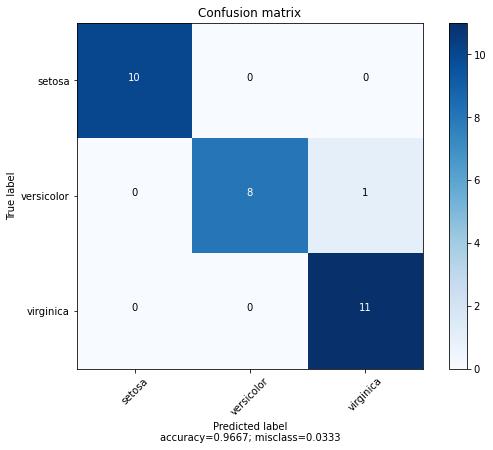

In [14]:
plot_confusion_matrix(cm, data.target_names)

### Forma mais elegante para o treinamento de uma Rede Neural

Usando GPU e melhorando a evolução do treinamento

In [15]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

#### Funções de utilidade

In [16]:
def accuracy(y_pred, y_test):
    y_pred_tags = torch.argmax(y_pred, dim=1)
    
    correct_pred = (y_pred_tags == y_test).float().sum()
    acc = correct_pred / y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

#Binary accuracy
def binary_acc(y_pred, y_test):
    y_pred_tags = torch.round(torch.sigmoid(y_pred))

    correct_pred = (y_pred_tags == y_test).float().sum()
    acc = correct_pred/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc




#### Treinamento

In [21]:
def train(model, train_loader, val_set, epochs, device, lr, binary=True, skip=1):

  if binary:
    criterion = nn.BCEWithLogitsLoss()
  else:
    criterion = nn.CrossEntropyLoss()


  optimizer = torch.optim.Adam(model.parameters(), lr=lr)

  history = {'acc_train' : [], 'loss_train': [], 'acc_val': [], 'loss_val': []}

  for e in tqdm(range(1, epochs+1)):
    
    y_hat = np.array([])

    train_epoch_loss = 0
    train_epoch_acc = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        X, y = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X)
        
        loss = criterion(y_pred, y)
        #acc = accuracy(y_pred, y)
        #Para classificação binária
        if binary:
          acc = binary_acc(y_pred,y)
        else:
          acc = accuracy(y_pred, y)
        
        loss.backward()
        optimizer.step()
        
        train_epoch_loss += loss.item()
        train_epoch_acc += acc.item()
        y_p = torch.argmax(y_pred, dim=1)
        y_hat = np.concatenate((y_hat, y_p))
    
    
    model.eval()
    _, val_loss, val_acc = evaluate(model, val_set, criterion, binary=binary)

    history['acc_train'].append(train_epoch_acc/len(train_loader))
    history['loss_train'].append(train_epoch_loss/len(train_loader))
    history['acc_val'].append(val_acc)
    history['loss_val'].append(val_loss)
    
    if e%skip == 0:
      print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.3f} | Val Loss: {val_loss:.4f} | Train Acc: {train_epoch_acc/len(train_loader):.4f}| Val Acc: {val_acc:.4f}')
  return history, y_hat


  

def evaluate(model, val_set, criterion, binary=True):
    X = val_set.X_data
    y = val_set.y_data

    with torch.no_grad():
      y_pred = model(X)
                
    loss = criterion(y_pred, y)
    
    #Para classificação binária
    if binary:
      acc = binary_acc(y_pred, y)
    else:
      acc = accuracy(y_pred, y)

    val_epoch_loss = loss.item()
    val_epoch_acc = acc
    
    return y_pred, val_epoch_loss, val_epoch_acc


In [23]:
model = NeuralNetwork(hidden_neurons=hidden_neurons, n_input=4, n_output=3)
history, y_hat = train(model, train_loader, val_dataset, n_epochs, device, lr, binary=False, skip=50)

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 050: | Train Loss: 1.098 | Val Loss: 1.0890 | Train Acc: 37.0000| Val Acc: 47.0000
Epoch 100: | Train Loss: 1.052 | Val Loss: 1.0536 | Train Acc: 73.0000| Val Acc: 78.0000
Epoch 150: | Train Loss: 0.970 | Val Loss: 0.9781 | Train Acc: 71.5000| Val Acc: 72.0000
Epoch 200: | Train Loss: 0.848 | Val Loss: 0.8645 | Train Acc: 71.5000| Val Acc: 72.0000
Epoch 250: | Train Loss: 0.723 | Val Loss: 0.7463 | Train Acc: 73.2500| Val Acc: 77.0000
Epoch 300: | Train Loss: 0.625 | Val Loss: 0.6518 | Train Acc: 78.2500| Val Acc: 85.0000
Epoch 350: | Train Loss: 0.558 | Val Loss: 0.5843 | Train Acc: 81.7500| Val Acc: 88.0000
Epoch 400: | Train Loss: 0.510 | Val Loss: 0.5359 | Train Acc: 81.7500| Val Acc: 92.0000
Epoch 450: | Train Loss: 0.475 | Val Loss: 0.4992 | Train Acc: 86.2500| Val Acc: 92.0000
Epoch 500: | Train Loss: 0.446 | Val Loss: 0.4691 | Train Acc: 89.5000| Val Acc: 93.0000
Epoch 550: | Train Loss: 0.420 | Val Loss: 0.4428 | Train Acc: 91.7500| Val Acc: 93.0000
Epoch 600: | Train Lo

## Anexo - Construindo uma rede do zero

Redes Neurais constituem uma das técnicas mais populares de Inteligência Computacional. Por mais que esta técnica tenha um potencial para mapeamento de diversos problemas, o conceito básico sobre o seu funcionamento não é impossível de ser entendido.

Nesta parte, iremos construir uma Rede Neural do zero. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class NeuralNetwork():
    def __init__(self,nin,nout,hidden_neurons=[2],hidden_layers=1,activation=['relu']):
        '''
        Classe para a implementação do algoritmo de Redes Neurais para a atividade prática da disciplina Inteligência Computacional Aplicada - PUC-Rio
        
        Variáveis de entrada:
        nin - Quantidade de entradas da Rede (int)
        nout - Quantidade de neurônios na saída da Rede (int)
        hidden_neurons - Quantidade de neurônios na camada escondida. Deve ser uma lista de inteiros positivos.
        hidden_layers - Quantidade de camadas escondidas. (int)
        activation - Função de ativação para cada uma das camadas. Deve ser uma lista de strings.
        
        '''
        
        #Entrada do modelo
        self.input = nin 
        #Saída do modelo
        self.output = nout 
        #Lista de neurônios. Começa a contagem da entrada do modelo.
        self.hn = [nin] + hidden_neurons 
        
        self.hl = hidden_layers

        #Dicionário com todas as possíveis funções de ativação. Caso construa alguma outra, adicione a esta lista.
        self.possible_activations = {'relu':self.relu, 'tanh':np.tanh, 'sigmoid':self.sigmoid}

        #Inicialização dos pesos ao criar o novo objeto
        self.initialize_weights(activation)




    def initialize_weights(self,activation):

        #Matriz de pesos 
        self.weights = dict()
        #Vetor de bias
        self.bias = dict()

        #Erros
        self.weights_error = dict()
        self.bias_error = dict()

        #Ativacao do neuronio
        self.neuron_out = dict()
        
        
        self.neuron_net = dict()

        self.activation = dict()




        for i in range(self.hl):
            name = f'hidden{i}'

            self.weights[name] = np.random.rand(self.hn[i+1], self.hn[i])*2 - 1.0
            self.bias[name] = np.zeros((self.hn[i+1],1))

            self.weights_error[name] = np.zeros((self.hn[i+1], self.hn[i]))
            self.bias_error[name] = np.zeros((self.hn[i+1],1))

            self.activation[name] = self.possible_activations[activation[i]]

            self.neuron_out[name] = np.zeros((self.hn[i+1],1))
            self.neuron_net[name] = np.zeros((self.hn[i], 1))


        self.weights['output'] = np.random.rand(self.output, self.hn[-1])*2 - 1.0
        self.bias['output'] = np.zeros((self.output, 1))

        self.weights_error['output'] = np.zeros((self.output, self.hn[-1]))
        self.bias_error['output'] = np.zeros((self.output,1))

        self.activation['output'] = self.possible_activations[activation[-1]]

        self.neuron_out['output'] = np.zeros((self.output,1))

        self.neuron_net['output'] = np.zeros((self.hn[-1],1))

    def insert_layers(self,weights=[],bias=[]):
        '''
        Função para inserção manual dos pesos. 
        '''
        self.weights = weights
        self.bias = bias 

    def neuron_process(self,x=[],weights=[],bias=[]):
        '''
        Função para regra de propagação
        '''
        return np.dot(weights,x) + bias


    def forward(self,x):
        '''
        Função para etapa feedforward
        '''
        input_values = x
        for layer in self.weights:

            self.neuron_net[layer] = np.copy(input_values)

            A = self.neuron_process(x=input_values,weights=self.weights[layer],bias=self.bias[layer])
            self.neuron_out[layer] = self.activation[layer](A)
            
            input_values = self.activation[layer](A)

        return self.activation['output'](A)


    def backward(self,lr,y):
        '''
        Função para a etapa feedback
        '''
        for layer in reversed(self.weights):

            if layer == 'output':
                # (sj - tj)
                dZ2 = y - self.neuron_out[layer]
                #Atualizacao de W 
                dW2 = np.dot(dZ2, self.neuron_net[layer].T)
                #Atualizacao de bias
                db2 = np.sum(dZ2, axis=1, keepdims=True)
                
                
                self.weights_error[layer] = lr * dW2 
                self.bias_error[layer] = lr * db2 
                prev_weights = self.weights[layer]
            else:
                #Erro na camada intermediaria                        F'(net) -> função tanh
                dZ1 = np.multiply(np.dot(prev_weights.T, dZ2), 1-np.power(self.neuron_out[layer], 2))
                
                
                dW1 = np.dot(dZ1, self.neuron_net[layer].T)
                
                db1 = np.sum(dZ1, axis=1, keepdims=True)
                self.weights_error[layer] = lr * dW1 
                self.bias_error[layer] = lr * db1 

                prev_weights = self.weights[layer]
                dZ2 = np.copy(dZ1)
            

    def update_weights(self):
        '''
        Função para atualização dos pesos
        '''
        for layer in self.weights:

            assert(self.weights[layer].shape == self.weights_error[layer].shape), f"Dimension mismatch: {self.weights[layer].shape} and {self.weights_error[layer].shape}"
            self.weights[layer] = self.weights[layer] + self.weights_error[layer]

            assert(self.bias[layer].shape == self.bias_error[layer].shape), f"Dimension mismatch: {self.bias[layer].shape} and {self.bias_error[layer].shape}"
            self.bias[layer] = self.bias[layer] + self.bias_error[layer]
            self.weights_error[layer] = np.zeros(self.weights_error[layer].shape)
            self.bias_error[layer] = np.zeros(self.bias_error[layer].shape)

    def train(self,x,y,epochs=100,lr=0.5):
        '''
        Função para treinamento da rede
        '''
        for epoch in range(epochs):
            out = self.forward(x)

            self.backward(lr,y)
            
            self.update_weights()



    @staticmethod
    def sigmoid(x):
        '''
        Definição da função sigmoide. Retorna o valor 1/(1 + e^(-x))
        '''
        sigm = 1/(1 + np.exp(-x))
        return sigm

    
    def sigmoid_derivative(self,value):
        '''
        ???
        '''
        return self.sigmoid(value)*(1-self.sigmoid(value))

    @staticmethod
    def relu(x):
        return np.maximum(np.zeros(x.shape),x)

    @staticmethod 
    def relu_derivative(x):
        return np.ones(x.shape)

In [ ]:
nn_test = NeuralNetwork(2,1,hidden_layers=1,hidden_neurons=[4],activation=['tanh','sigmoid'])

In [ ]:
x = np.array([[0],[0]])
weights = np.array([[ 3.14708825, -3.02515284],[-3.48236268,  3.60001384]])
bias = np.array([[1.43813902],[1.67767442]])

nn_test.neuron_process(x=x,weights=weights,bias=bias)

In [ ]:
t = np.linspace(-10,10,100)

In [ ]:
plt.plot(t,nn_test.sigmoid(t),linewidth=2,color='g')
plt.title('Função sigmoide')
plt.xlabel('x')
plt.ylabel('sigm(x)')

In [ ]:
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
Y = np.array([[0, 1, 1, 0]])

#X = np.array([[0,0],[0,1],[1,0],[1,1]])
#Y = np.array([[0],[1],[1],[0]])

nn_test.train(X,Y,epochs=1500,lr=0.2)

In [ ]:
X_test = np.array([[0],[0]])
print(nn_test.forward(X_test))

X_test = np.array([[0],[1]])
print(nn_test.forward(X_test))

X_test = np.array([[1],[0]])
print(nn_test.forward(X_test))

X_test = np.array([[1],[1]])
print(nn_test.forward(X_test))

In [ ]:
manual_weights = dict()
manual_bias = dict()
manual_weights['hidden0'] = np.array([[ 3.14708825, -3.02515284],
        [-3.48236268,  3.60001384]])
manual_weights['output'] = np.array([[-5.07678577, -5.01607987]])

manual_bias['hidden0'] = np.array([[1.43813902],
        [1.67767442]])
manual_bias['output'] = np.array([[4.49745273]])

nn_test.insert_layers(weights=manual_weights,bias=manual_bias)

In [ ]:
nn_test.weights

In [ ]:
nn_test.neuron_out